Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months: cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months: cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

Dataset-EastWestAirlines.xlsx

In [44]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import cdist 

In [45]:
# Loading Dataset
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [47]:
print(f"Missing values in each variable: \n{data.isnull().sum()}")

Missing values in each variable: 
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [48]:
print(f"Duplicated rows: {data.duplicated().sum()}")

Duplicated rows: 0


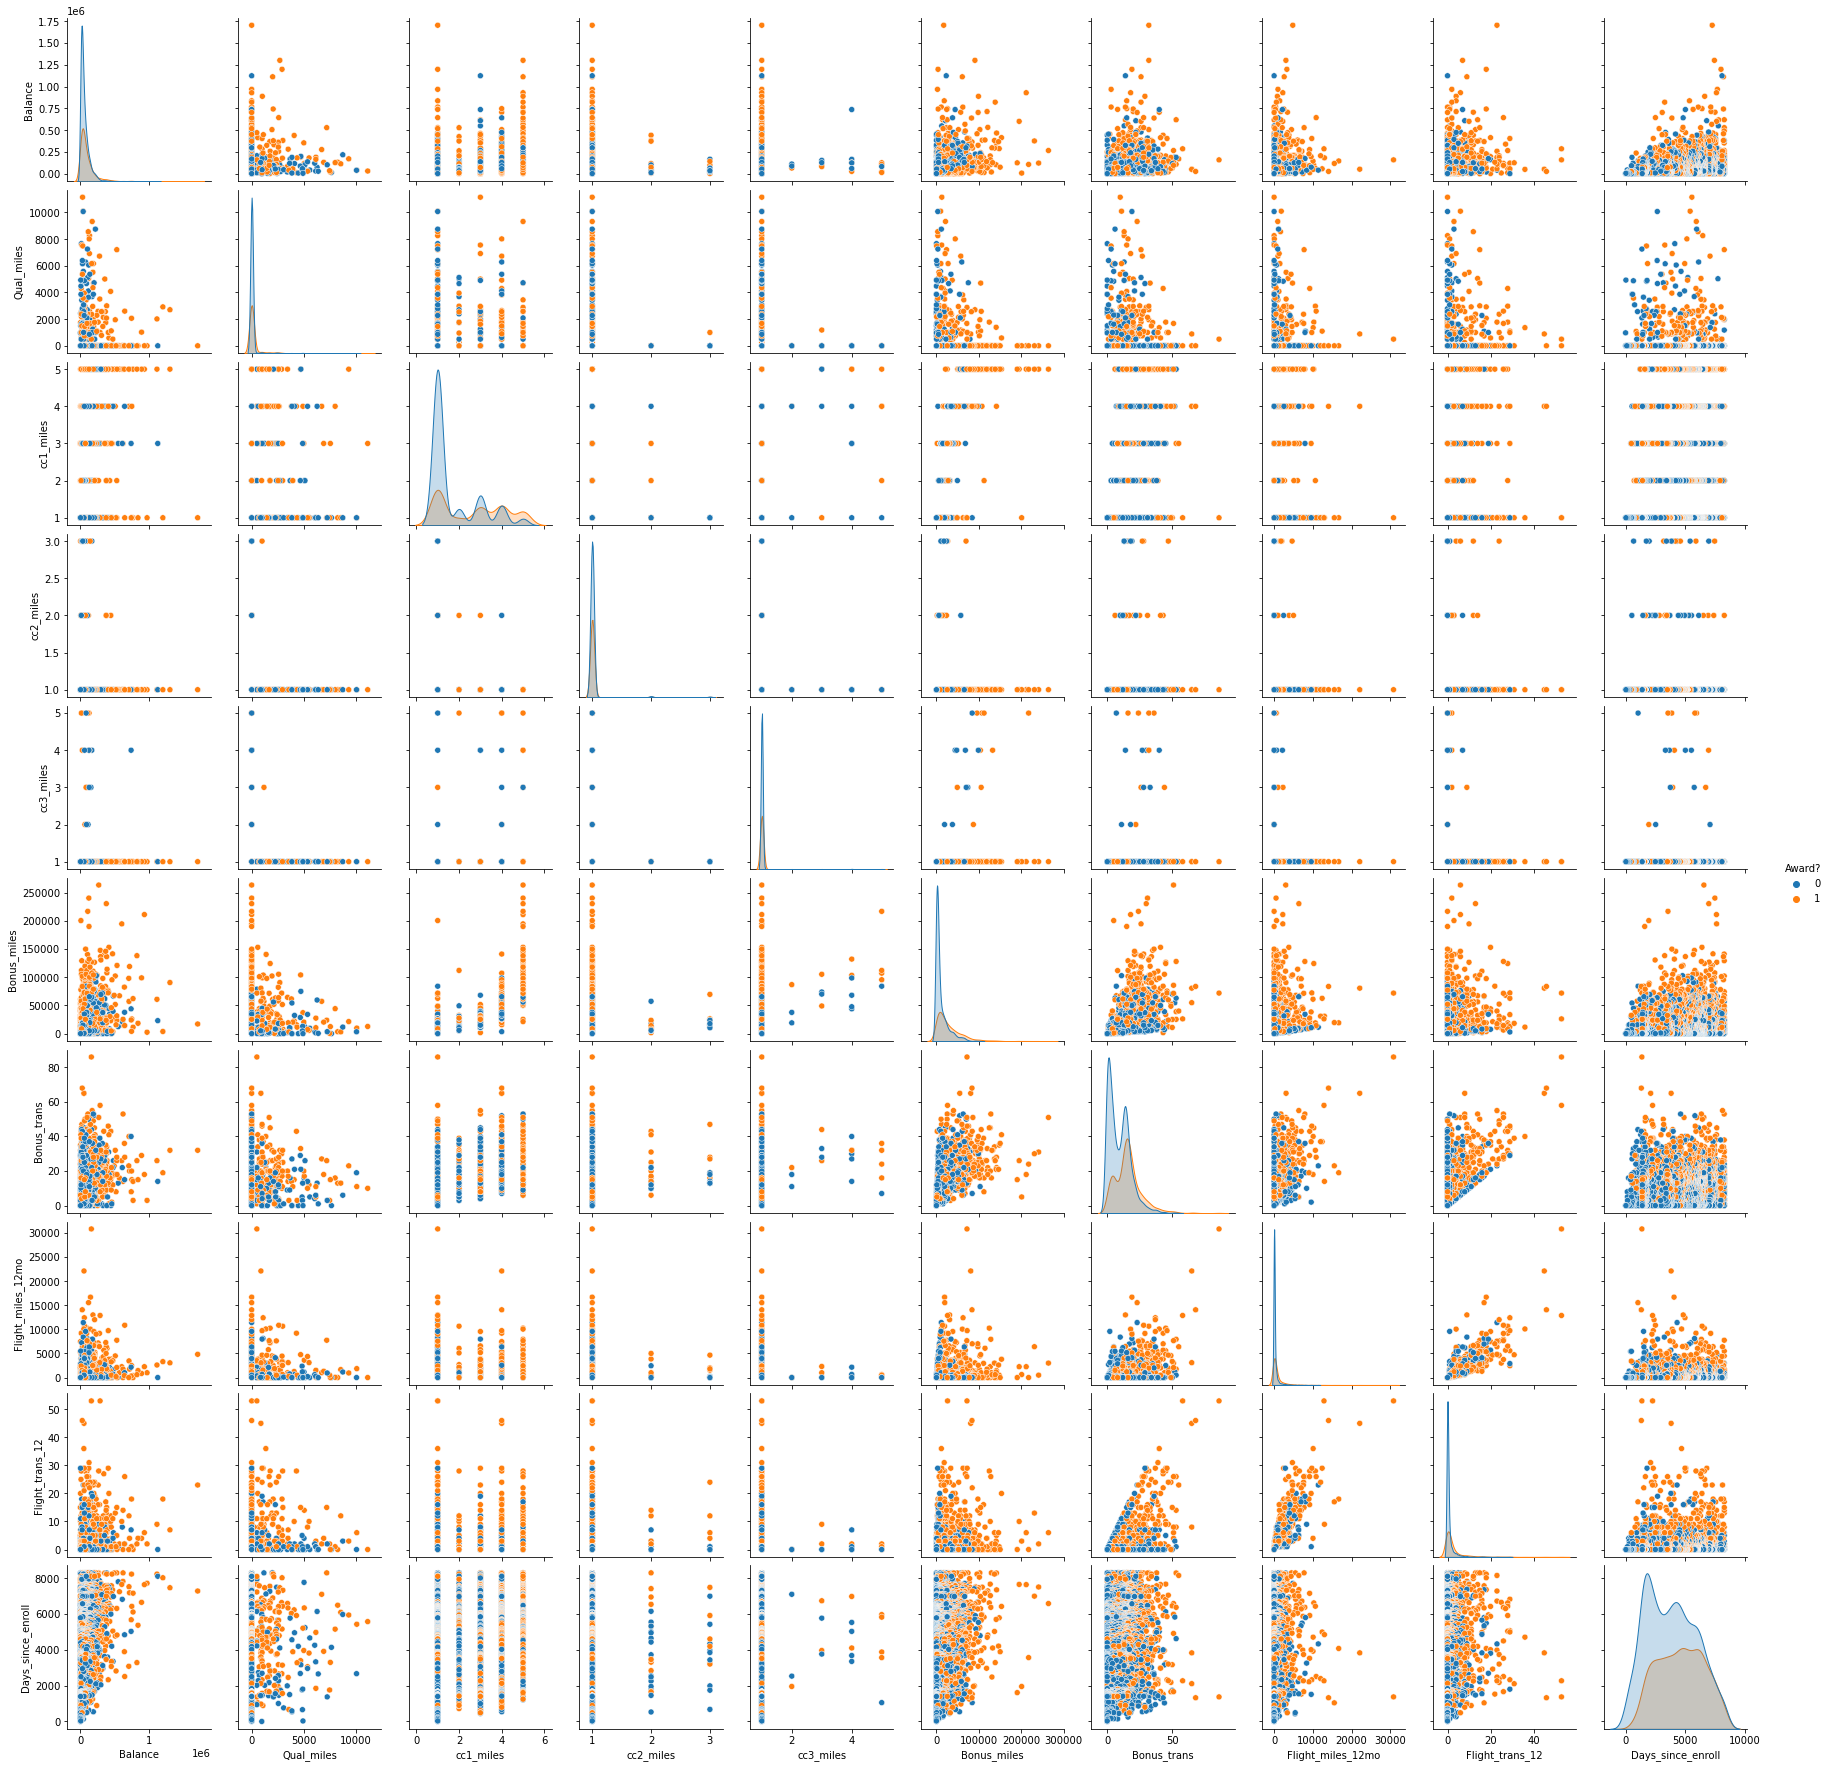

In [49]:
sns.pairplot(data.iloc[:,1:12],hue='Award?')

# K Means Clustering

In [50]:
df_norm_Air = norm_func(data.iloc[:,:])
df_norm_Air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [51]:
dk = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm_Air)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm_Air.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm_Air.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
print('Inertia : ',kmeans.inertia_)
print('Score : ',kmeans.score)

Inertia :  244.07044505595692
Score :  <bound method KMeans.score of KMeans(n_clusters=14)>


([<matplotlib.axis.XTick at 0x20e5ff76b50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

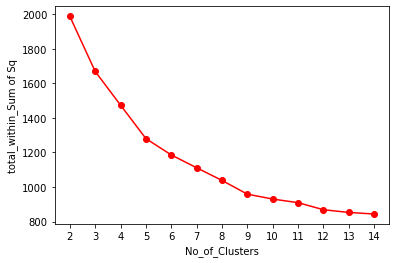

In [52]:
plt.plot(k,TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_Sum of Sq")
plt.xticks(k)

In [54]:
model1=KMeans(n_clusters=10) 
model1.fit(df_norm_Air)

KMeans(n_clusters=10)

In [55]:
# getting the labels of clusters assigned to each row 
model1.labels_


# converting numpy array into pandas series object 
md=pd.Series(model1.labels_) 

#create a new column
data['clust']=md 
 
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7
1,2,19244,0,1,1,1,215,2,0,0,6968,0,7
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,7
3,4,14776,0,1,1,1,500,1,0,0,6952,0,7
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4


# Hierarchial Clustering

In [56]:
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model2.fit_predict(data.iloc[:,0:14])

array([3, 3, 3, ..., 1, 3, 3], dtype=int64)

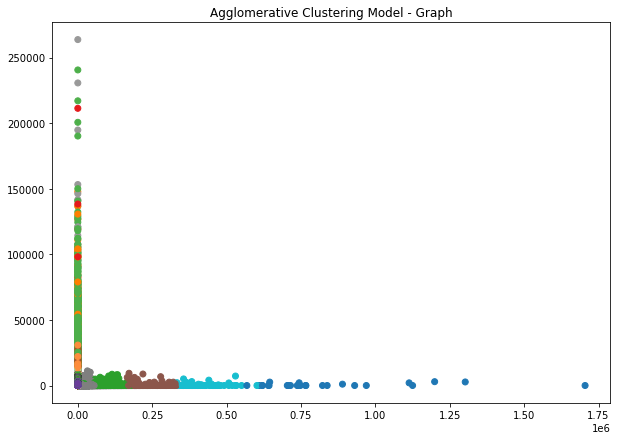

In [63]:
plt.figure(figsize=(10,7))
plt.title("Agglomerative Clustering Model - Graph")
plt.scatter(data.iloc[:,1], data.iloc[:,2], c=model2.labels_, cmap='tab10')
plt.scatter(data.iloc[:,3], data.iloc[:,4], c=model2.labels_, cmap='rainbow')
plt.scatter(data.iloc[:,5], data.iloc[:,6], c=model2.labels_, cmap='Set1')
plt.scatter(data.iloc[:,7], data.iloc[:,8], c=model2.labels_, cmap='tab20c')
plt.scatter(data.iloc[:,9], data.iloc[:,10], c=model2.labels_, cmap='Paired')
plt.show()

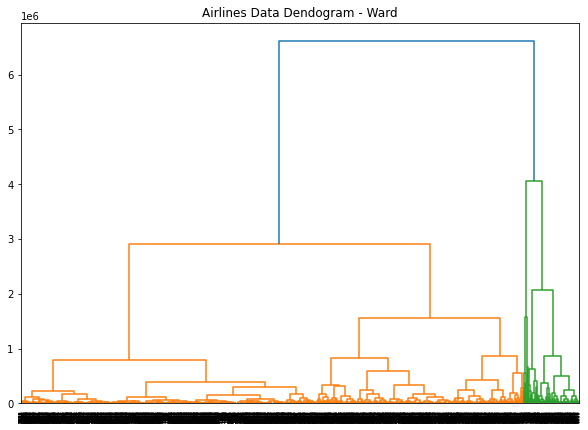

In [64]:
plt.figure(figsize=(10, 7))
plt.title("Airlines Data Dendogram - Ward")
dend = shc.dendrogram(shc.linkage(data.iloc[:,:13], method='ward'))

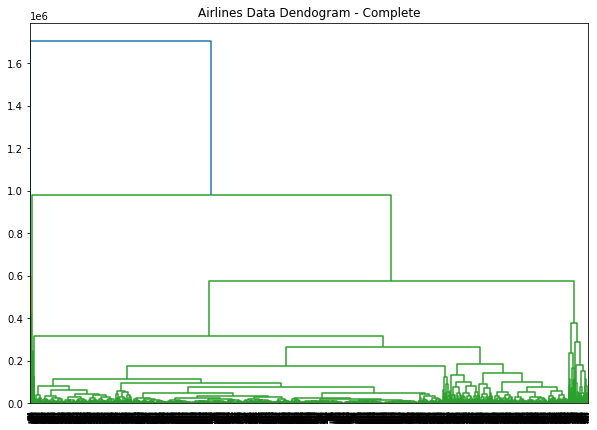

In [65]:
plt.figure(figsize=(10,7))
plt.title("Airlines Data Dendogram - Complete")
dend = shc.dendrogram(shc.linkage(data.iloc[:,:13], method='complete'))

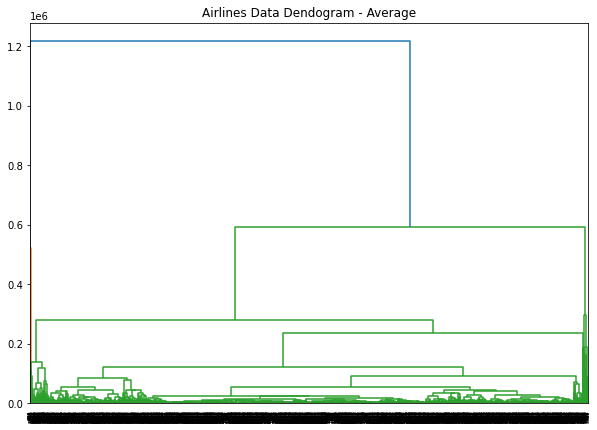

In [66]:
plt.figure(figsize=(10, 7))
plt.title("Airlines Data Dendogram - Average")
dend = shc.dendrogram(shc.linkage(data.iloc[:,:13], method='average'))

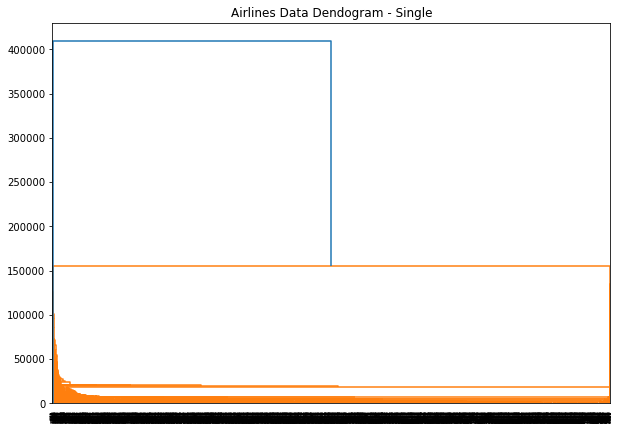

In [67]:
plt.figure(figsize=(10,7))
plt.title("Airlines Data Dendogram - Single")
dend = shc.dendrogram(shc.linkage(data.iloc[:,:13], method='single'))

# DBSCAN clustering

In [68]:
model3 = DBSCAN(eps=0.30, min_samples=9)
model3.fit_predict(data.iloc[:,:13])

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

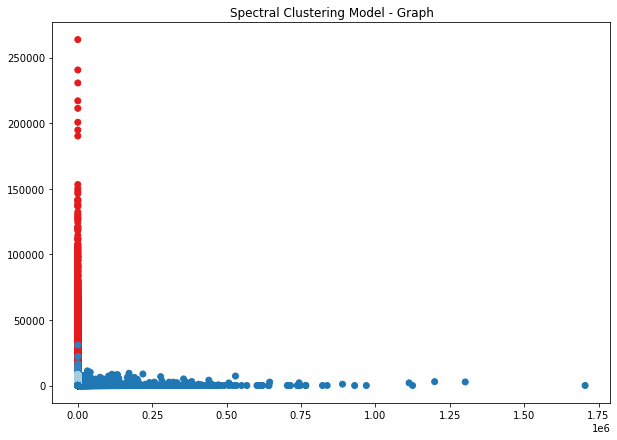

In [69]:
plt.figure(figsize=(10,7))
plt.title("Spectral Clustering Model - Graph")
plt.scatter(data.iloc[:,1], data.iloc[:,2], c=model3.labels_, cmap='tab10')
plt.scatter(data.iloc[:,3], data.iloc[:,4], c=model3.labels_, cmap='rainbow')
plt.scatter(data.iloc[:,5], data.iloc[:,6], c=model3.labels_, cmap='Set1')
plt.scatter(data.iloc[:,7], data.iloc[:,8], c=model3.labels_, cmap='tab20c')
plt.scatter(data.iloc[:,9], data.iloc[:,10], c=model3.labels_, cmap='Paired')
plt.scatter(data.iloc[:,11],data.iloc[:,12], c=model3.labels_, cmap='tab20')
plt.show()